In [4]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
# BiocManager::install("scater", version = "3.8")
# BiocManager::install("scran", version = "3.8")
BiocManager::install("qvalue", version = "3.8")

Bioconductor version 3.8 (BiocManager 1.30.4), R 3.5.1 (2018-07-02)
Installing package(s) 'qvalue'
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Update old packages: 'backports', 'BH', 'broom', 'callr', 'caret', 'class',
  'cli', 'clipr', 'codetools', 'colorspace', 'curl', 'data.table', 'dbplyr',
  'ddalpha', 'digest', 'dimRed', 'dplyr', 'evaluate', 'fansi', 'forcats',
  'formatR', 'geometry', 'gower', 'haven', 'htmlwidgets', 'httpuv', 'httr',
  'ipred', 'IRdisplay', 'IRkernel', 'jsonlite', 'kernlab', 'knitr', 'later',
  'lattice', 'lava', 'magic', 'markdown', 'MASS', 'Matrix', 'mgcv', 'mime',
  'ModelMetrics', 'modelr', 'openssl', 'pillar', 'pkgconfig', 'pls',
  'processx', 'purrr', 'R6', 'Rcpp', 'readr', 'readxl', 'recipes', 'repr',
  'reprex', 'rlang', 'rmarkdown', 'robustbase', 'rstudioapi', 'scales',
  'sfsmisc', 'shiny', 'stringi', 'stringr', 'survival', 'testthat', 'tibble',
  'tidyr', 'tidyselect', 'tinytex', 'TTR', 'xfun', 'xtable', 'xts', 'zoo'

In [19]:
col_day0 = canva_pal("Pool party")(4)[1]
col_day1 = canva_pal("Pool party")(4)[2]
col_day2 = canva_pal("Pool party")(4)[3]
col_day3 = canva_pal("Pool party")(4)[4]

col_ips = canva_pal("Modern and clean")(4)[2]
col_mesendo = canva_pal("Modern and clean")(4)[4]
col_defendo = canva_pal("Warm tones")(4)[3]

# col_ips = "cornflowerblue"
# col_mesendo = "forestgreen"
# col_defendo = "coral"

In [1]:
## load useful libraries
suppressWarnings(suppressPackageStartupMessages(library(rhdf5)))
suppressWarnings(suppressPackageStartupMessages(library(qvalue)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(ggbeeswarm)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
suppressWarnings(suppressPackageStartupMessages(library(scater)))
suppressWarnings(suppressPackageStartupMessages(library(SingleCellExperiment)))
suppressWarnings(suppressPackageStartupMessages(library(edgeR)))
suppressWarnings(suppressPackageStartupMessages(library(limma)))
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
# suppressWarnings(suppressPackageStartupMessages(library(ISLR)))
# suppressWarnings(suppressPackageStartupMessages(library(GGally)))
suppressWarnings(suppressPackageStartupMessages(library(scran)))
# suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
# suppressWarnings(suppressPackageStartupMessages(library(circlize)))

In [2]:
# load sceset
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [5]:
# sce

In [10]:
counts(sce)[1:5,1:5]

,21843_1#10,21843_1#100,21843_1#101,21843_1#102,21843_1#103
ENSG00000000003_TSPAN6,6.477660e+01,44.121248,74.62608,30.9973289,57.660477
ENSG00000000419_DPM1,5.914126e+01,33.543099,146.40061,107.1315402,88.443606
ENSG00000000457_SCYL3,1.741212e-04,0.140723,0.00000,0.8536811,3.526533
ENSG00000000460_C1orf112,2.558570e+00,11.291487,24.45429,44.6795240,23.378878
ENSG00000001036_FUCA2,9.389441e+00,6.909795,11.61077,13.6207492,28.625064


In [11]:
filename = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts_counts.tsv"
write.table(counts(sce),filename,sep="\t",quote = F, row.names = T, col.names = T)

In [9]:
log2(counts(sce)[1:5,1:5]+1)

,21843_1#10,21843_1#100,21843_1#101,21843_1#102,21843_1#103
ENSG00000000003_TSPAN6,6.039502460,5.4957351,6.240812,4.999880,5.874317
ENSG00000000419_DPM1,5.910283209,5.1103256,7.203599,6.756644,6.482906
ENSG00000000457_SCYL3,0.000251182,0.1899486,0.000000,0.890393,2.178407
ENSG00000000460_C1orf112,1.831297511,3.6195875,4.669837,5.513476,4.607560
ENSG00000001036_FUCA2,3.377046191,2.9836403,3.656584,3.869945,4.888746


In [7]:
logcounts(sce)[1:5,1:5]

,21843_1#10,21843_1#100,21843_1#101,21843_1#102,21843_1#103
ENSG00000000003_TSPAN6,5.5207770563,6.4562078,5.878671,4.8608241,5.903640
ENSG00000000419_DPM1,5.3924605058,6.0659226,6.838769,6.6142685,6.512403
ENSG00000000457_SCYL3,0.0001741556,0.3525966,0.000000,0.8259555,2.201697
ENSG00000000460_C1orf112,1.4719275194,4.5369683,4.318528,5.3730090,4.636175
ENSG00000001036_FUCA2,2.9088018801,3.8673273,3.321747,3.7364760,4.917576


In [15]:
rownames(sce)[grep("RPS26",rownames(sce))]

[1] "ENSG00000125901_MRPS26"   "ENSG00000197728_RPS26"   
[3] "ENSG00000212829_RPS26P3"  "ENSG00000212994_RPS26P6" 
[5] "ENSG00000234354_RPS26P47"

In [4]:
# normalize
sce <- normalize(sce)
# define design matrix with batch structure (experiment)
design <- model.matrix(~experiment, data = colData(sce))
# define highly variable genes
alt.fit <- trendVar(sce, design = design, use.spikes = FALSE)
alt.decomp <- decomposeVar(sce, alt.fit)

Warning message in .get_all_sf_sets(object):
“spike-in set 'ERCC' should have its own size factors”

In [5]:
# get top 500
top.500.hvgs <- rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),][1:500,])

# get PC1 from expression of the top 500 hvgs
sce_500hvg = sce[rownames(sce) %in% top.500.hvgs,]
p1 = as.data.frame(prcomp(t(logcounts(sce_500hvg)))$x[,1])
colnames(p1) = "PC1_top500hvgs"
head(p1)

,PC1_top500hvgs
,<dbl>
21843_1#10,-11.7695261
21843_1#100,5.1315308
21843_1#101,-0.6430211
21843_1#102,-14.5080208
21843_1#103,-5.8029849
21843_1#105,-2.3442226


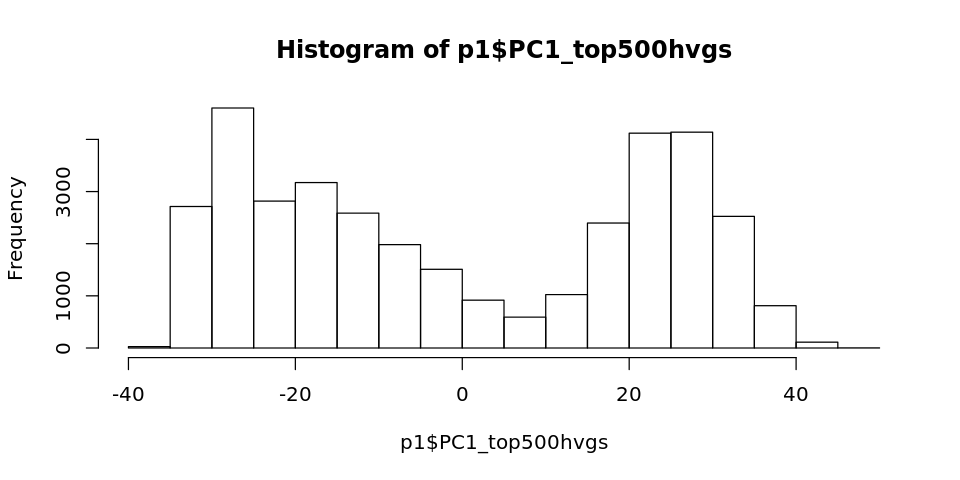

In [6]:
# use as pseudotime
options(repr.plot.width = 8, repr.plot.height = 4) 
hist(p1$PC1_top500hvgs)

In [7]:
range01 <- function(x){(x-min(x))/(max(x)-min(x))}

In [16]:
# # plot stage definition : iPS
# df = cbind(p1, logcounts(sce)["ENSG00000111704_NANOG",], sce$day)
# colnames(df) = c("pseudotime","NANOG","day")
# df$scaled_pseudo <- range01(df$pseudotime)

# options(repr.plot.width = 8, repr.plot.height = 4) 
# ggplot(df, aes(x = scaled_pseudo, y = NANOG, colour = day)) +
#         geom_point(alpha = 0.4)  + 
#         scale_color_canva(palette = "Pool party") + 
#         stat_smooth(colour = "darkblue", linetype = 2) + theme(legend.position = "none")
# ggplot(df, aes(x = scaled_pseudo, y = NANOG, colour = day)) +
#         geom_point(alpha = 0.1, col = "grey")  + 
# #         scale_color_canva(palette = "Pool party") + 
#         geom_point(aes(x = scaled_pseudo, y = NANOG), colour = "cornflowerblue",
#                data = dplyr::filter(df,  pseudotime < -20, day == "day0"),
#                   alpha = 0.3) +
#         stat_smooth(colour = "darkblue", linetype = 2) 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


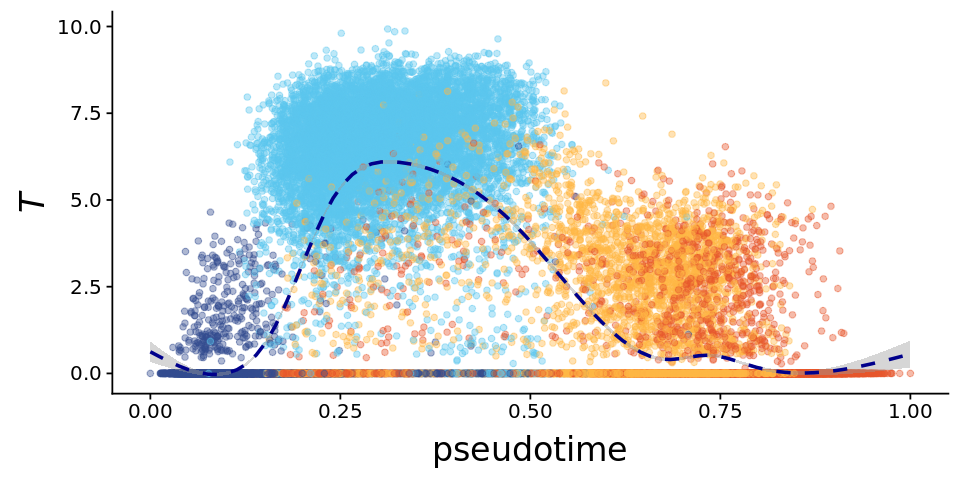

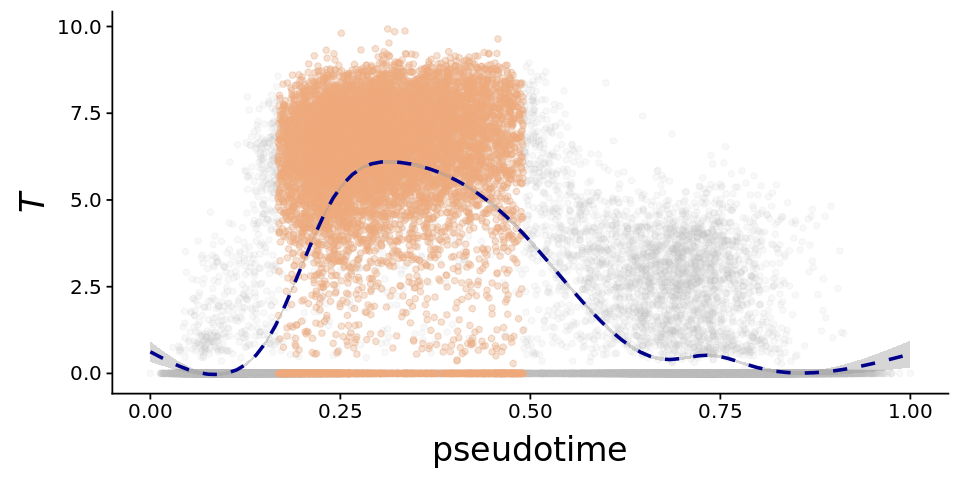

In [21]:
# plot stage definition : mesendo
df = cbind(p1, logcounts(sce)["ENSG00000164458_T",], sce$day)
colnames(df) = c("pseudotime","T","day")
df$scaled_pseudo <- range01(df$pseudotime)

options(repr.plot.width = 8, repr.plot.height = 4) 
ggplot(df, aes(x = scaled_pseudo, y = T, colour = day)) +
        geom_point(alpha = 0.4)  + xlab("pseudotime") +
        scale_color_canva(palette = "Pool party") + 
        stat_smooth(colour = "darkblue", linetype = 2) + theme(text = element_text(size = 20)) +
        theme(legend.position = "none") + theme(axis.title.y = element_text(face = "italic", size = 20))
ggplot(df, aes(x = scaled_pseudo, y = T, colour = day))  + 
        geom_point(alpha = 0.1, col = "grey")  + xlab("pseudotime") +
#         scale_color_canva(palette = "Pool party") + 
        geom_point(aes(x = scaled_pseudo, y = T), colour = col_mesendo,
               data = dplyr::filter(df, pseudotime > -23 & pseudotime < 4, day %in% c("day1","day2")),
                  alpha = 0.3) + theme(text = element_text(size = 20)) +
        theme(axis.title.y = element_text(face = "italic", size = 20)) + 
        stat_smooth(colour = "darkblue", linetype = 2) 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


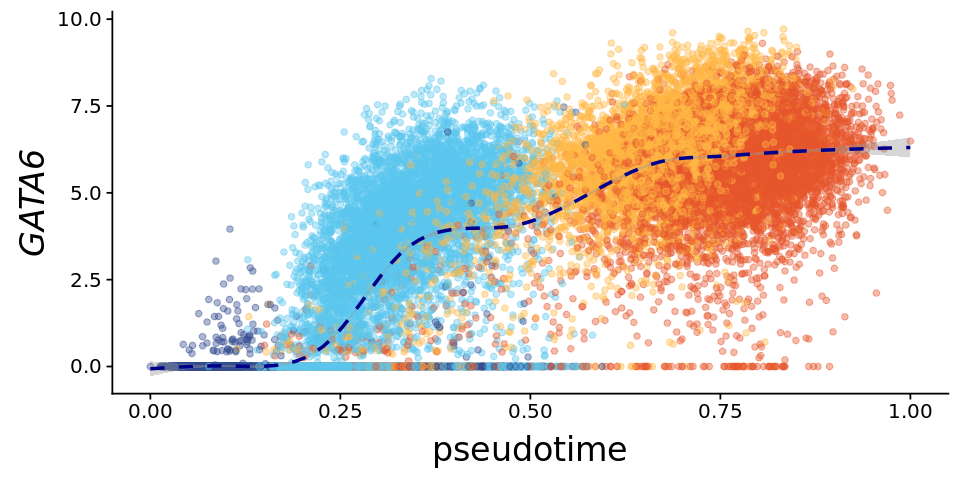

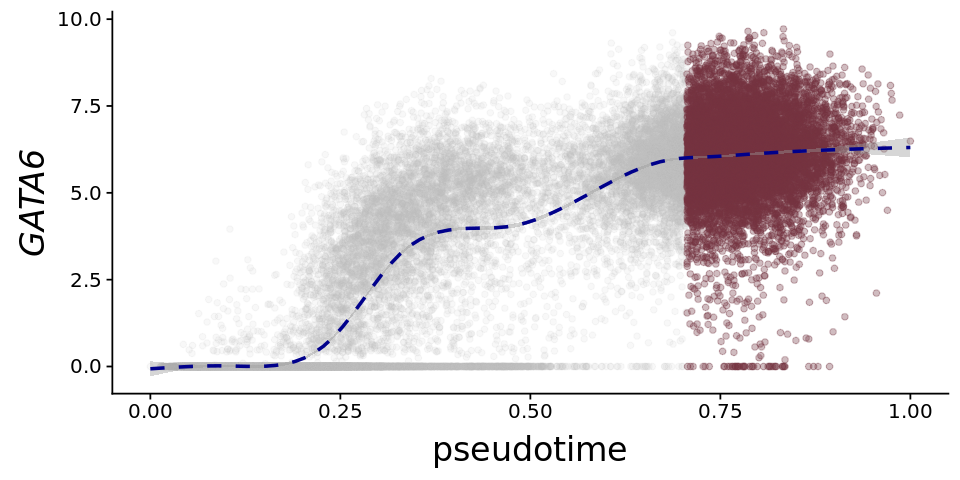

In [22]:
# plot stage definition : defendo
df = cbind(p1, logcounts(sce)["ENSG00000141448_GATA6",], sce$day)
colnames(df) = c("pseudotime","GATA6","day")
df$scaled_pseudo <- range01(df$pseudotime)

options(repr.plot.width = 8, repr.plot.height = 4) 
ggplot(df, aes(x = scaled_pseudo, y = GATA6, colour = day)) +
        geom_point(alpha = 0.4) + xlab("pseudotime") + theme(text = element_text(size = 20)) +
        scale_color_canva(palette = "Pool party") + theme(axis.title.y = element_text(face = "italic", size = 20)) +
        stat_smooth(colour = "darkblue", linetype = 2) + theme(legend.position = "none")
ggplot(df, aes(x = scaled_pseudo, y = GATA6, colour = day)) + 
        geom_point(alpha = 0.1, col = "grey") + xlab("pseudotime")   + 
        geom_point(aes(x = scaled_pseudo, y = GATA6), colour = col_defendo,
               data = dplyr::filter(df, pseudotime >  22, day %in% c("day2","day3")),
                  alpha = 0.3) + theme(text = element_text(size = 20)) +
        stat_smooth(colour = "darkblue", linetype = 2) + theme(axis.title.y = element_text(face = "italic", size = 20))

In [8]:
sce$pc1top500hvgs = p1$PC1_top500hvgs
sce_ips = sce[, sce$day == "day0" & sce$pc1top500hvgs < -20]
sce_mesendo = sce[, sce$day %in% c("day1","day2") & sce$pc1top500hvgs > -23 & sce$pc1top500hvgs < 4]
sce_defendo = sce[, sce$day %in% c("day2","day3") & sce$pc1top500hvgs > 22]

In [9]:
sce$stage_pc1top500hvgs = "not assigned"
sce$stage_pc1top500hvgs[sce$day == "day0" & sce$pc1top500hvgs < -20] = "ips"
sce$stage_pc1top500hvgs[sce$day %in% c("day1","day2") & sce$pc1top500hvgs > -23 & sce$pc1top500hvgs < 4] = "mesendo"
sce$stage_pc1top500hvgs[sce$day %in% c("day2","day3") & sce$pc1top500hvgs > 22] = "defendo"

In [10]:
df = data.frame(cell = sce$cell_name, stage = sce$stage_pc1top500hvgs)
head(df)

cell,stage
<chr>,<chr>
21843_1#10,mesendo
21843_1#100,not assigned
21843_1#101,mesendo
21843_1#102,mesendo
21843_1#103,mesendo
21843_1#105,mesendo


In [13]:
nrow(df)

[1] 36044

In [12]:
write.table(df,"/hps/nobackup/stegle/users/acuomo/cells_by_stage.tsv", sep = "\t", quote = F)

In [13]:
# number of cells at each stage
unique(sce$stage_pc1top500hvgs)
ncol(sce[,sce$stage_pc1top500hvgs == "not assigned"])
ncol(sce[,sce$stage_pc1top500hvgs == "ips"])
ncol(sce[,sce$stage_pc1top500hvgs == "mesendo"])
ncol(sce[,sce$stage_pc1top500hvgs == "defendo"])

[1] "mesendo"      "not assigned" "defendo"      "ips"

[1] 7073

[1] 8975

[1] 9809

[1] 10187

In [14]:
####

In [15]:
sce_day0 = sce[,sce$day == "day0"]
sce_day1 = sce[,sce$day == "day1"]
sce_day3 = sce[,sce$day == "day3"]

In [16]:
length(unique(sce_day1$donor))
length(unique(sce_day3$donor))
length(unique(sce_mesendo$donor))
length(unique(sce_defendo$donor))
sce_mesendo_day1 = sce_mesendo[,sce_mesendo$day == "day1"]
length(unique(sce_mesendo_day1$donor))
sce_defendo_day3 = sce_defendo[,sce_defendo$day == "day3"]
length(unique(sce_defendo_day3$donor))

[1] 111

[1] 108

[1] 123

[1] 116

[1] 111

[1] 108

In [17]:
set.seed(147)
n = ncol(sce_mesendo_day1)
subset_day1 = sce_day1[, sample(ncol(sce_day1),n)]
ncol(subset_day1)

[1] 8997

In [18]:
set.seed(0308)
n = ncol(sce_defendo_day3)
subset_day3 = sce_day3[, sample(ncol(sce_day3),n)]
ncol(subset_day3)

[1] 6638

In [19]:
PlotLogFold <- function(genes, sce1, sce2, label = ""){
    genes_symbols = gsub(".*_","",genes)
    n = length(genes_symbols)
    logfold = matrix(0, nrow = n, ncol = 2)
    for (i in 1:n){
        gene = genes[i]
        a = logcounts(sce1)[gene,]
        b = logcounts(sce2)[gene,]
        logfold[i,1] = mean(a) - mean(b)
        logfold[i,2] = t.test(a,b)[["p.value"]]
    }
    df = as.data.frame(logfold)
    rownames(df) = genes_symbols[1:n]
    colnames(df) = c("logfold","pv")
    df$corr_pv = df$pv*nrow(df)
    df$gene = rownames(df)
    df_reduced = df[df$logfold > 0,]
    p = ggplot(df, aes(x = gene, y = logfold )) 
    p = p + geom_bar(stat = "identity") 
    p = p + geom_bar(aes(x = gene, y = logfold ),stat = "identity", 
             data = df[df$corr_pv < 0.01,], fill = "firebrick") 
    p = p + ylab(label) + ylim(c(-0.5,0.5))

    options(repr.plot.width = 6, repr.plot.height = 5)
    p = p + coord_flip()
    print(p)
}

In [20]:
## define known marker genes
pluri_markers <- c("ENSG00000111704_NANOG", "ENSG00000204531_POU5F1", 
                   "ENSG00000164362_TERT", "ENSG00000181449_SOX2",
                   "ENSG00000121570_DPPA4")
pluri_markers_select <- c("ENSG00000111704_NANOG", "ENSG00000204531_POU5F1", 
                          "ENSG00000181449_SOX2", "ENSG00000121570_DPPA4")
mesendo_markers <- c("ENSG00000164458_T", "ENSG00000163508_EOMES",
                     "ENSG00000185155_MIXL1")
defendo_markers <- c("ENSG00000121966_CXCR4", "ENSG00000136574_GATA4",
                     "ENSG00000141448_GATA6", "ENSG00000125798_FOXA2",
                     "ENSG00000164736_SOX17", "ENSG00000133937_GSC",
                     "ENSG00000147869_CER1", "ENSG00000132130_LHX1")
defendo_markers_select <- c("ENSG00000121966_CXCR4", "ENSG00000136574_GATA4",
                            "ENSG00000164736_SOX17", "ENSG00000141448_GATA6",
                            "ENSG00000147869_CER1", "ENSG00000132130_LHX1",
                           "ENSG00000133937_GSC")
later_markers <- c("ENSG00000152804_HHEX", "ENSG00000170608_FOXA3")
diff_genes <- c(pluri_markers, mesendo_markers, defendo_markers, later_markers)

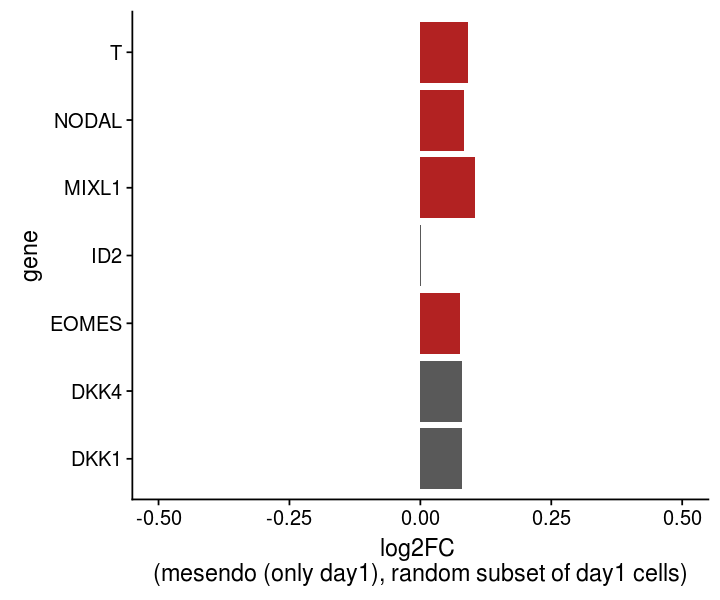

In [23]:
PlotLogFold(genes = c(mesendo_markers, "ENSG00000107984_DKK1",'ENSG00000104371_DKK4','ENSG00000115738_ID2',
                      'ENSG00000156574_NODAL'), sce1 = sce_mesendo_day1, sce2 = subset_day1, 
            label = "log2FC \n(mesendo (only day1), random subset of day1 cells)")

Warning message:
“Removed 1 rows containing missing values (position_stack).”Warning message:
“Removed 1 rows containing missing values (position_stack).”

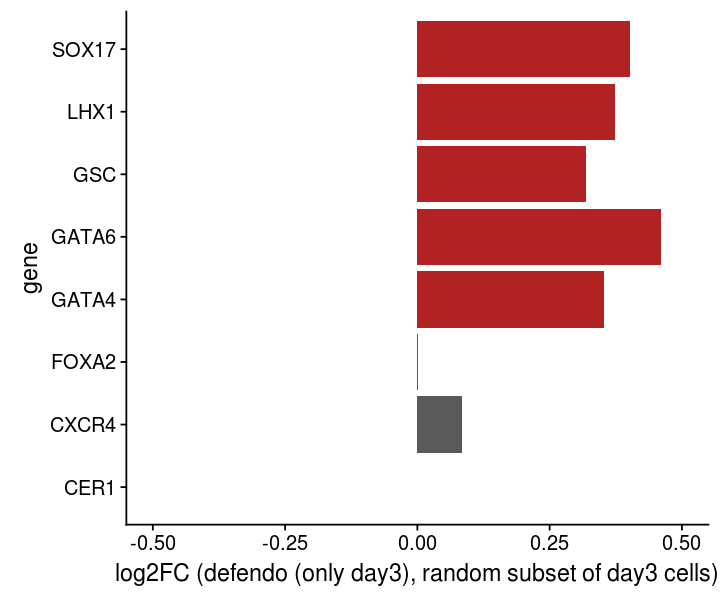

In [22]:
PlotLogFold(genes = defendo_markers, sce1 = sce_defendo_day3, sce2 = subset_day3, 
            label = "log2FC (defendo (only day3), random subset of day3 cells)")

Warning message:
“Removed 4 rows containing missing values (position_stack).”Warning message:
“Removed 4 rows containing missing values (position_stack).”

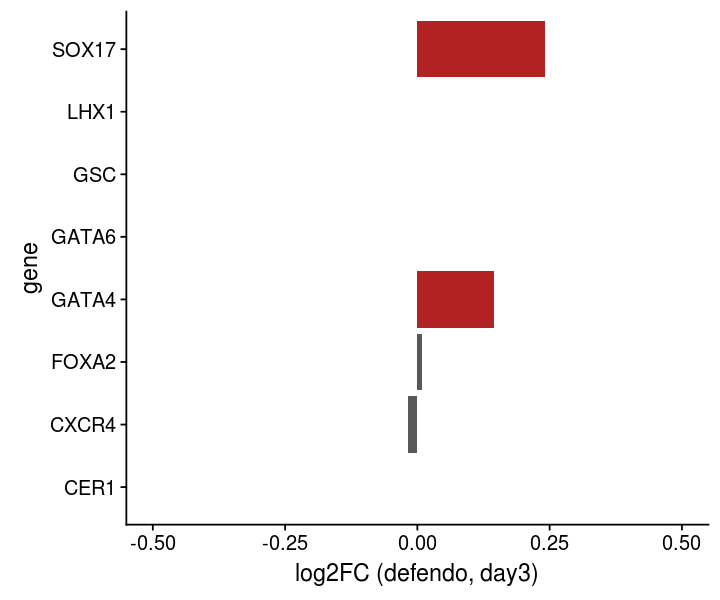

In [24]:
PlotLogFold(genes = defendo_markers, sce1 = sce_defendo, sce2 = sce_day3, 
            label = "log2FC (defendo, day3)")

In [23]:
#### define input files for QTL mapping

In [24]:
# mean by don + expt
get_means_byexpt <- function(sceset, ngenes, l){
    n = length(l)
    means <- matrix(0,nrow = ngenes, ncol = n)
    for (i in 1:n){
        don = gsub("*-.*","",l[i])
        expt = gsub("*-.*","",gsub(".*-e","e",l[i]))
        day = gsub(".*-","",l[i])
        sc <- logcounts(sceset)[,sceset$donor_short_id == don & sceset$experiment == expt & sceset$day == day]
        means[,i] <- rowMeans(sc)
    }
    rownames(means) = rownames(sceset)
    colnames(means) = l
    means
}

In [25]:
######## iPS ########

In [26]:
#### phenotype (mean)

In [32]:
ips_inputfiles_folder = "/hps/nobackup/stegle/users/acuomo/singlecell_endodiff/mean_eqtls/ips/"

In [30]:
mysce = sce_ips
mat = table(mysce$donor_short_id, mysce$experiment) 
ord = which(table(mysce$donor_short_id, mysce$experiment) > 1, arr.ind = T)
l = c()
for (i in 1:dim(ord)[1]){
    l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])
}
l0 = paste0(l, "-day0")

In [31]:
ngenes = nrow(sce_ips)
m_ips = get_means_byexpt(sce_ips, ngenes, l0)

In [39]:
length(l0)

[1] 136

In [33]:
head(m_ips)

,heth_1-expt_12-day0,jogf_2-expt_12-day0,pelm_3-expt_12-day0,vass_1-expt_12-day0,wibj_2-expt_12-day0,zapk_3-expt_12-day0,oaqd_3-expt_18-day0,paab_4-expt_18-day0,sita_1-expt_18-day0,toss_3-expt_18-day0,⋯,pipw_5-expt_44-day0,qehq_3-expt_44-day0,toco_5-expt_44-day0,uilk_3-expt_44-day0,ciwj_2-expt_45-day0,hajc_1-expt_45-day0,hecn_3-expt_45-day0,kuco_1-expt_45-day0,liqa_1-expt_45-day0,tert_1-expt_45-day0
ENSG00000000003_TSPAN6,5.4469800,5.7034278,5.5356333,5.648758,6.3659630,5.5368247,5.4873418,5.8133550,5.4623899,5.5672255,⋯,5.3272834,5.5646707,5.7005236,5.7212808,5.3881956,5.8301369,6.057284,6.0366109,6.2535447,5.688099
ENSG00000000419_DPM1,5.9894587,5.9644990,6.3746065,5.959287,6.0598796,6.0023189,5.9025619,5.7892892,5.9340182,5.9172765,⋯,5.5839056,5.4699003,5.5344813,5.5662855,6.2485630,6.3835045,5.597860,6.2607436,6.3099999,6.377758
ENSG00000000457_SCYL3,0.9212544,0.6871328,0.6591747,0.608450,0.4119406,0.5427939,0.5398574,0.6716997,0.7220381,0.5685936,⋯,0.8067444,0.7671859,0.8125844,0.5757963,0.8809326,0.7749346,0.819897,0.8086625,0.8132689,0.719932
ENSG00000000460_C1orf112,2.8202778,3.0162328,3.3008036,2.692615,3.0985460,3.0680940,2.8628466,3.0028131,2.9839516,3.1234285,⋯,3.0512545,3.2731209,3.2583717,2.9909444,3.1529905,3.5283609,3.439613,3.7407588,3.4435153,3.293092
ENSG00000001036_FUCA2,4.1356745,4.3976023,4.4827472,4.475107,4.6400641,4.2178105,4.1751756,3.8512946,3.8999002,4.4614390,⋯,3.9992706,4.1300095,4.2909554,4.2324405,4.5181642,4.6306028,4.529610,4.5495939,4.4680078,4.686037
ENSG00000001084_GCLC,1.7841541,2.5060660,2.1956768,1.983899,1.5692437,2.3295193,1.3941480,1.5480014,1.6053830,1.7421911,⋯,2.3914622,2.3581237,2.3742346,2.1894234,1.8856521,2.0593464,1.959076,2.1054378,2.0224356,2.021106


In [34]:
ips_mean_filename = paste0(ips_inputfiles_folder, "mean_logcounts.tsv")
write.table(m_ips, ips_mean_filename, sep = "\t", quote = F)

In [36]:
pcs = prcomp(t(m_ips))$x[,1:10]

In [37]:
head(pcs)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
heth_1-expt_12-day0,-18.277078,-6.783157,25.44419,-10.807565,7.051250,-28.62567,2.102389,0.4071554,8.057667,2.93799864
jogf_2-expt_12-day0,-12.037690,-14.694617,23.05359,-9.040762,7.227860,-27.63935,13.115501,0.7978657,6.452821,2.95942300
pelm_3-expt_12-day0,-7.293451,-14.258222,24.62240,6.986141,-5.888279,-20.15203,6.178443,7.5793794,7.462122,-2.13944571
vass_1-expt_12-day0,-8.870072,-16.328195,24.18293,9.507711,-6.980694,-19.05221,2.336124,10.8807697,10.386136,-1.20795195
wibj_2-expt_12-day0,-5.807548,-16.374495,21.47111,8.324629,-10.591480,-21.01508,8.357083,3.3011082,6.858405,-0.82548757
zapk_3-expt_12-day0,-7.185446,-15.649193,23.12483,4.721629,-4.856539,-22.48915,12.018079,1.1663088,4.634526,-0.09721741


In [38]:
ips_covs_filename = paste0(ips_inputfiles_folder, "mean_logcounts_10pcs_covs.tsv")
write.table(pcs, ips_covs_filename, sep = "\t", quote = F)

In [40]:
pheno = m_ips
c <- as.data.frame(matrix(colnames(pheno),nrow = dim(pheno)[2],ncol = 1))
colnames(c) <- "donor.expt.day"
c$donor = gsub("*-.*","",c$donor.expt.day)
c$expt = gsub("*-.*","",gsub(".*-e","e",c$donor.expt.day))
c$day = gsub(".*-","",c$donor.expt.day)

d <- cbind(unique(sce_mesendo$donor_long_id), unique(sce_mesendo$donor_short_id))

d <- as.data.frame(d)
colnames(d) <- c("donor_long_id","donor")
df <- left_join(c, d, by = "donor")
dim(df)
head(df)

# genotype_samples phenotype_samples
samples <- df[,c("donor_long_id", "donor.expt.day")]
colnames(samples) <- c()
head(samples)

[1] 136   5

donor.expt.day,donor,expt,day,donor_long_id
heth_1-expt_12-day0,heth_1,expt_12,day0,HPSI0214i-heth_1
jogf_2-expt_12-day0,jogf_2,expt_12,day0,NA
pelm_3-expt_12-day0,pelm_3,expt_12,day0,HPSI0214i-pelm_3
vass_1-expt_12-day0,vass_1,expt_12,day0,HPSI0114i-vass_1
wibj_2-expt_12-day0,wibj_2,expt_12,day0,HPSI0214i-wibj_2
zapk_3-expt_12-day0,zapk_3,expt_12,day0,HPSI0114i-zapk_3


HPSI0214i-heth_1,heth_1-expt_12-day0
NA,jogf_2-expt_12-day0
HPSI0214i-pelm_3,pelm_3-expt_12-day0
HPSI0114i-vass_1,vass_1-expt_12-day0
HPSI0214i-wibj_2,wibj_2-expt_12-day0
HPSI0114i-zapk_3,zapk_3-expt_12-day0


In [41]:
ips_samples_filename = paste0(ips_inputfiles_folder, "mean_samples.tsv")
write.table(samples, ips_samples_filename, sep = "\t", quote = F, col.names = F, row.names = F)

In [ ]:
####### DE stages vs days

In [32]:
sce_day0 = sce[,sce$day == "day0"]
sce_day1 = sce[,sce$day == "day1"]
sce_day3 = sce[,sce$day == "day3"]

In [53]:
ncol(sce_day0)
ncol(sce_day1)
ncol(sce_day3)

[1] 9661

[1] 9443

[1] 8485

In [54]:
length(unique(sce_day0$donor))
length(unique(sce_day1$donor))
length(unique(sce_day3$donor))

[1] 111

[1] 111

[1] 108

In [55]:
length(unique(sce_ips$donor))
length(unique(sce_mesendo$donor))
length(unique(sce_defendo$donor))

[1] 111

[1] 123

[1] 116

In [5]:
## define known marker genes
pluri_markers <- c("ENSG00000111704_NANOG", "ENSG00000204531_POU5F1", 
                   "ENSG00000164362_TERT", "ENSG00000181449_SOX2",
                   "ENSG00000121570_DPPA4")
pluri_markers_select <- c("ENSG00000111704_NANOG", "ENSG00000204531_POU5F1", 
                          "ENSG00000181449_SOX2", "ENSG00000121570_DPPA4")
mesendo_markers <- c("ENSG00000164458_T", "ENSG00000163508_EOMES",
                     "ENSG00000185155_MIXL1")
defendo_markers <- c("ENSG00000121966_CXCR4", "ENSG00000136574_GATA4",
                     "ENSG00000141448_GATA6", "ENSG00000125798_FOXA2",
                     "ENSG00000164736_SOX17", "ENSG00000133937_GSC",
                     "ENSG00000147869_CER1", "ENSG00000132130_LHX1")
defendo_markers_select <- c("ENSG00000121966_CXCR4", "ENSG00000136574_GATA4",
                            "ENSG00000164736_SOX17", "ENSG00000141448_GATA6",
                            "ENSG00000147869_CER1", "ENSG00000132130_LHX1",
                           "ENSG00000133937_GSC")
later_markers <- c("ENSG00000152804_HHEX", "ENSG00000170608_FOXA3")
diff_genes <- c(pluri_markers, mesendo_markers, defendo_markers, later_markers)

In [6]:
diff_genes

[1] "ENSG00000111704_NANOG"  "ENSG00000204531_POU5F1" "ENSG00000164362_TERT"  
 [4] "ENSG00000181449_SOX2"   "ENSG00000121570_DPPA4"  "ENSG00000164458_T"     
 [7] "ENSG00000163508_EOMES"  "ENSG00000185155_MIXL1"  "ENSG00000121966_CXCR4" 
[10] "ENSG00000136574_GATA4"  "ENSG00000141448_GATA6"  "ENSG00000125798_FOXA2" 
[13] "ENSG00000164736_SOX17"  "ENSG00000133937_GSC"    "ENSG00000147869_CER1"  
[16] "ENSG00000132130_LHX1"   "ENSG00000152804_HHEX"   "ENSG00000170608_FOXA3"

In [7]:
diff_symbols = gsub(".*_","",diff_genes)
diff_symbols

[1] "NANOG"  "POU5F1" "TERT"   "SOX2"   "DPPA4"  "T"      "EOMES"  "MIXL1" 
 [9] "CXCR4"  "GATA4"  "GATA6"  "FOXA2"  "SOX17"  "GSC"    "CER1"   "LHX1"  
[17] "HHEX"   "FOXA3"

In [8]:
PlotLogFold <- function(genes, sce1, sce2, label = ""){
    genes_symbols = gsub(".*_","",genes)
    n = length(genes_symbols)
    logfold = matrix(0, nrow = n, ncol = 2)
    for (i in 1:n){
        gene = genes[i]
        a = logcounts(sce1)[gene,]
        b = logcounts(sce2)[gene,]
        logfold[i,1] = mean(a) - mean(b)
        logfold[i,2] = t.test(a,b)[["p.value"]]
    }
    df = as.data.frame(logfold)
    rownames(df) = genes_symbols[1:n]
    colnames(df) = c("logfold","pv")
    df$corr_pv = df$pv*nrow(df)
    df$gene = rownames(df)
    df_reduced = df[df$logfold > 0,]
    p = ggplot(df, aes(x = gene, y = logfold )) 
    p = p + geom_bar(stat = "identity") 
    p = p + geom_bar(aes(x = gene, y = logfold ),stat = "identity", 
             data = df[df$corr_pv < 0.01,], fill = "firebrick") 
    p = p + ylab(label) + ylim(c(-0.5,0.5))

    options(repr.plot.width = 6, repr.plot.height = 5)
    p = p + coord_flip()
    print(p)
}

In [40]:
sce_ips = sce[,sce$stage == "ips"]
sce_mesendo = sce[,sce$stage == "mesendo"]
sce_defendo = sce[,sce$stage == "defendo"]

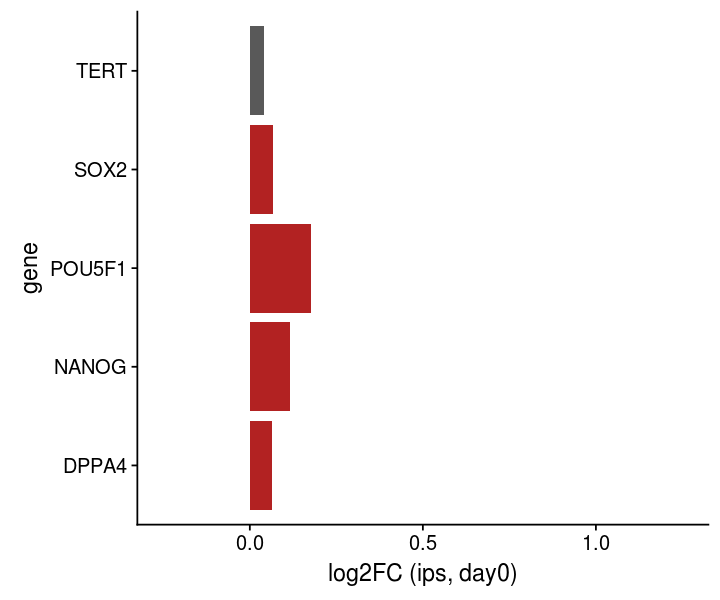

In [57]:
PlotLogFold(genes = pluri_markers, sce1 = sce_ips, sce2 = sce_day0, label = "log2FC (ips, day0)")

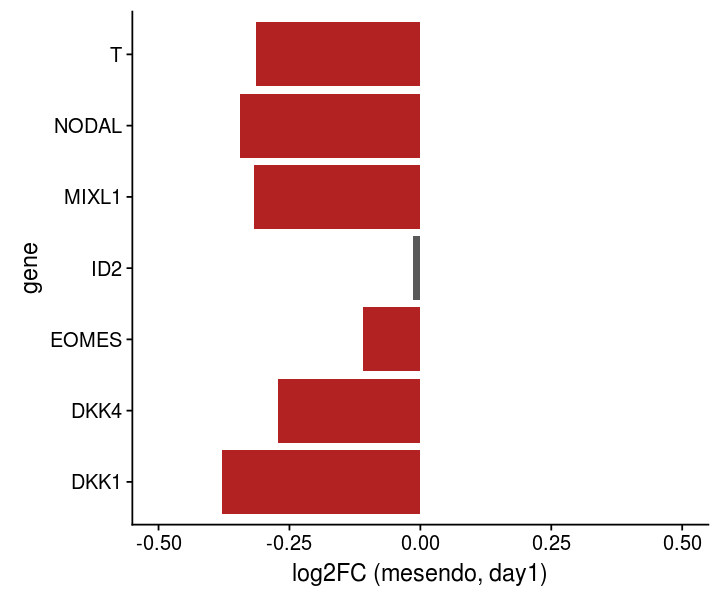

In [65]:
PlotLogFold(genes = c(mesendo_markers, "ENSG00000107984_DKK1",'ENSG00000104371_DKK4','ENSG00000115738_ID2',
                      'ENSG00000156574_NODAL'), sce1 = sce_mesendo, sce2 = sce_day1, label = "log2FC (mesendo, day1)")

In [ ]:
PlotLogFold(genes = c(mesendo_markers, "ENSG00000107984_DKK1",'ENSG00000104371_DKK4','ENSG00000115738_ID2',
                      'ENSG00000156574_NODAL'), sce1 = sce_mesendo[,sce$day == "day1"], sce2 = sce_day1, label = "log2FC (mesendo, day1)")

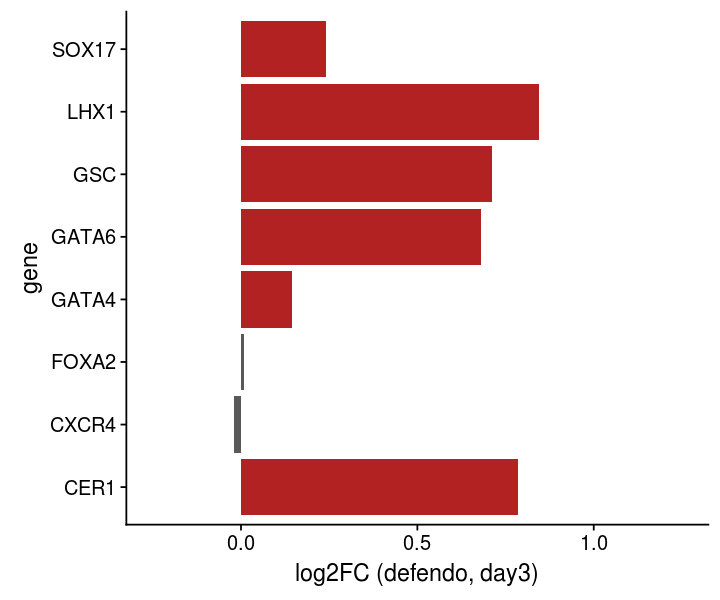

In [63]:
PlotLogFold(genes = c(defendo_markers), sce1 = sce_defendo, sce2 = sce_day3, label = "log2FC (defendo, day3)")

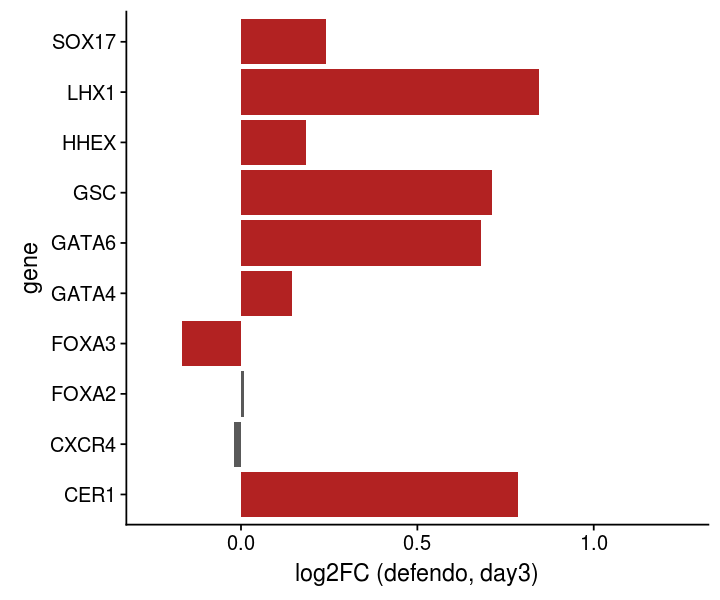

In [59]:
PlotLogFold(genes = c(defendo_markers,later_markers), sce1 = sce_defendo, sce2 = sce_day3, label = "log2FC (defendo, day3)")

In [61]:
rownames(sce)[grep("DKK1", rownames(sce))]
rownames(sce)[grep("DKK4", rownames(sce))]
rownames(sce)[grep("ID2", rownames(sce))]
rownames(sce)[grep("NODAL", rownames(sce))]

[1] "ENSG00000107984_DKK1"

[1] "ENSG00000104371_DKK4"

[1] "ENSG00000008083_JARID2"  "ENSG00000115738_ID2"    
[3] "ENSG00000126226_PCID2"   "ENSG00000152208_GRID2"  
[5] "ENSG00000176396_EID2"    "ENSG00000176401_EID2B"  
[7] "ENSG00000186314_PRELID2" "ENSG00000189079_ARID2"

[1] "ENSG00000156574_NODAL"

In [36]:
n = length(diff_symbols)
logfold = matrix(0, nrow = n, ncol = 2)

In [38]:
for (i in 1:n){
#     gene = gsub(".*_","",defendo_markers_select[i])
    gene = diff_genes[i]
    a = logcounts(sce_defendo)[gene,]
    b = logcounts(sce_day3)[gene,]
    logfold[i,1] = mean(a) - mean(b)
    logfold[i,2] = t.test(a,b)[["p.value"]]
}

In [39]:
df = as.data.frame(logfold)
rownames(df) = diff_symbols[1:n]
colnames(df) = c("logfold","pv")
df$corr_pv = df$pv*nrow(df)
df$gene = rownames(df)
df_reduced = df[df$logfold > 0,]
df

,logfold,pv,corr_pv,gene
NANOG,-0.598353578,1.173128e-141,2.111630e-140,NANOG
POU5F1,0.334296101,1.293426e-25,2.328167e-24,POU5F1
TERT,-0.050479131,3.669864e-06,6.605756e-05,TERT
SOX2,-0.212938964,2.611339e-73,4.700410e-72,SOX2
DPPA4,-0.198693792,1.882808e-36,3.389055e-35,DPPA4
T,0.005752857,6.635283e-01,1.194351e+01,T
EOMES,0.602226272,2.121581e-184,3.818846e-183,EOMES
MIXL1,0.633813382,7.677058e-66,1.381870e-64,MIXL1
CXCR4,-0.018535873,6.560529e-01,1.180895e+01,CXCR4
GATA4,0.144411807,2.231319e-05,4.016375e-04,GATA4


Warning message:
“Removed 1 rows containing missing values (position_stack).”Warning message:
“Removed 1 rows containing missing values (position_stack).”

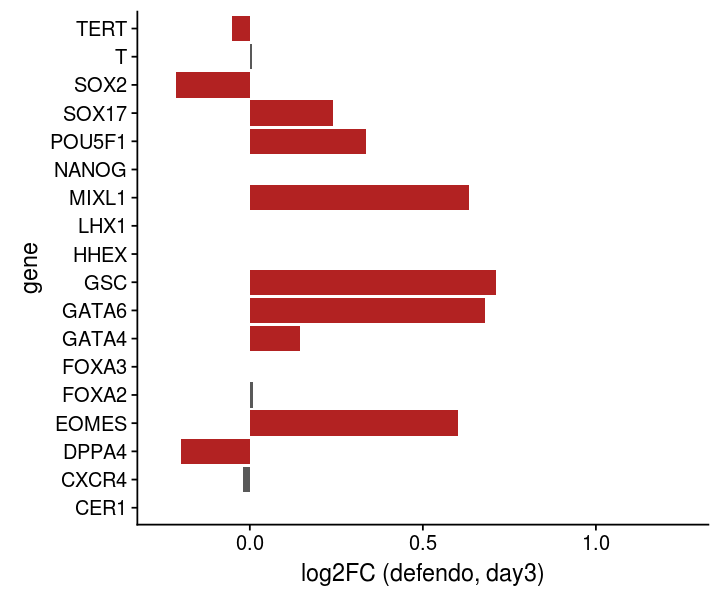

In [40]:
p = ggplot(df, aes(x = gene, y = logfold )) + 
    geom_bar(stat = "identity") +
    geom_bar(aes(x = gene, y = logfold ),stat = "identity", 
             data = df[df$corr_pv < 0.01,], fill = "firebrick") + ylab("log2FC (defendo, day3)") + ylim(c(-0.25,1.25))

options(repr.plot.width = 6, repr.plot.height = 5)
p + coord_flip()

In [42]:
for (i in 1:n){
#     gene = gsub(".*_","",defendo_markers_select[i])
    gene = diff_genes[i]
    a = logcounts(sce_mesendo)[gene,]
    b = logcounts(sce_day1)[gene,]
    logfold[i,1] = mean(a) - mean(b)
    logfold[i,2] = t.test(a,b)[["p.value"]]
}

In [43]:
df = as.data.frame(logfold)
rownames(df) = diff_symbols[1:n]
colnames(df) = c("logfold","pv")
df$corr_pv = df$pv*nrow(df)
df$gene = rownames(df)
df_reduced = df[df$logfold > 0,]
df

,logfold,pv,corr_pv,gene
NANOG,0.158963307,6.941302e-08,1.249434e-06,NANOG
POU5F1,0.016307791,7.103717e-01,1.278669e+01,POU5F1
TERT,-0.001544855,9.265745e-01,1.667834e+01,TERT
SOX2,0.122069310,2.774807e-07,4.994653e-06,SOX2
DPPA4,0.046933456,3.508086e-04,6.314555e-03,DPPA4
T,-0.313441352,4.499237e-27,8.098626e-26,T
EOMES,-0.109338252,2.416325e-06,4.349386e-05,EOMES
MIXL1,-0.316778522,1.116656e-24,2.009981e-23,MIXL1
CXCR4,0.004766186,6.082513e-01,1.094852e+01,CXCR4
GATA4,-0.045915911,2.041900e-02,3.675420e-01,GATA4


Warning message:
“Removed 2 rows containing missing values (position_stack).”Warning message:
“Removed 2 rows containing missing values (position_stack).”

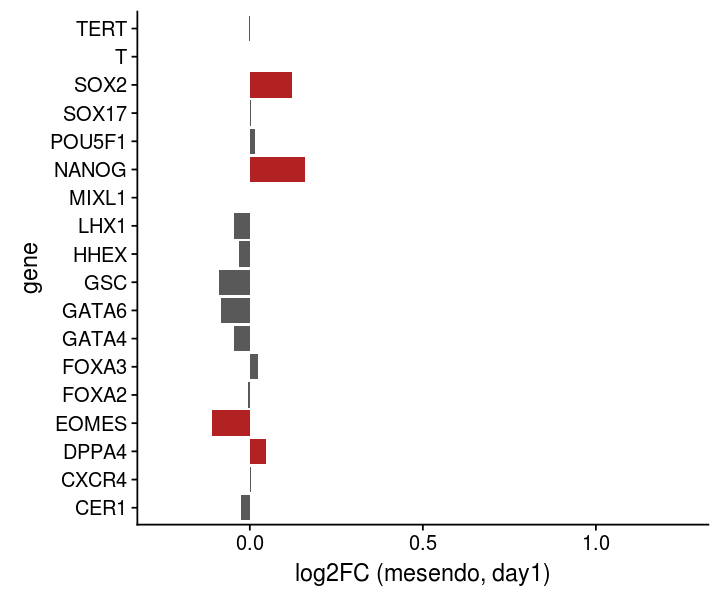

In [45]:
p = ggplot(df, aes(x = gene, y = logfold )) + 
    geom_bar(stat = "identity") +
    geom_bar(aes(x = gene, y = logfold ),stat = "identity", 
             data = df[df$corr_pv < 0.01,], fill = "firebrick") + ylab("log2FC (mesendo, day1)") + ylim(c(-0.25,1.25))

options(repr.plot.width = 6, repr.plot.height = 5)
p + coord_flip()

In [46]:
for (i in 1:n){
#     gene = gsub(".*_","",defendo_markers_select[i])
    gene = diff_genes[i]
    a = logcounts(sce_ips)[gene,]
    b = logcounts(sce_day0)[gene,]
    logfold[i,1] = mean(a) - mean(b)
    logfold[i,2] = t.test(a,b)[["p.value"]]
}

In [47]:
df = as.data.frame(logfold)
rownames(df) = diff_symbols[1:n]
colnames(df) = c("logfold","pv")
df$corr_pv = df$pv*nrow(df)
df$gene = rownames(df)
df_reduced = df[df$logfold > 0,]
df

,logfold,pv,corr_pv,gene
NANOG,0.116178973,7.826975e-07,1.408856e-05,NANOG
POU5F1,0.175367253,8.741468e-05,1.573464e-03,POU5F1
TERT,0.039537501,5.229061e-02,9.412310e-01,TERT
SOX2,0.068066419,1.364736e-03,2.456524e-02,SOX2
DPPA4,0.064402246,1.051638e-11,1.892948e-10,DPPA4
T,-0.006476963,2.688863e-01,4.839954e+00,T
EOMES,-0.013099323,3.117803e-02,5.612045e-01,EOMES
MIXL1,-0.010189727,4.166431e-01,7.499575e+00,MIXL1
CXCR4,-0.003868488,7.500760e-01,1.350137e+01,CXCR4
GATA4,-0.006214158,5.282346e-02,9.508223e-01,GATA4


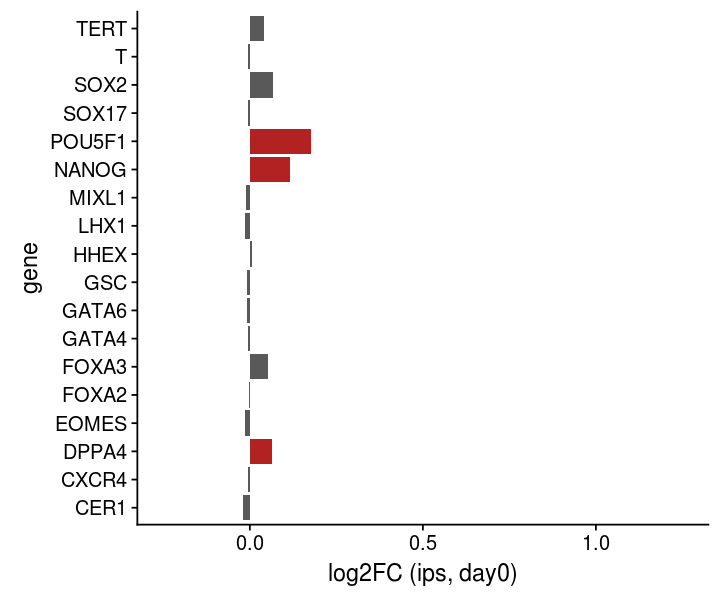

In [49]:
p = ggplot(df, aes(x = gene, y = logfold )) + 
    geom_bar(stat = "identity") +
    geom_bar(aes(x = gene, y = logfold ),stat = "identity", 
             data = df[df$corr_pv < 0.01,], fill = "firebrick") + ylab("log2FC (ips, day0)") + ylim(c(-0.25,1.25))

options(repr.plot.width = 6, repr.plot.height = 5)
p + coord_flip()

In [2]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20181003/sce_merged.rds")

In [25]:
sce

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC

In [10]:
sce_ips_lambda = sce[,sce$stage_lambda == "ips"]
sce_mesendo_lambda = sce[,sce$stage_lambda == "mesendo"]
sce_defendo_lambda = sce[,sce$stage_lambda == "defendo"]

In [11]:
sce_day0 = sce[,sce$day == "day0"]
sce_day1 = sce[,sce$day == "day1"]
sce_day3 = sce[,sce$day == "day3"]

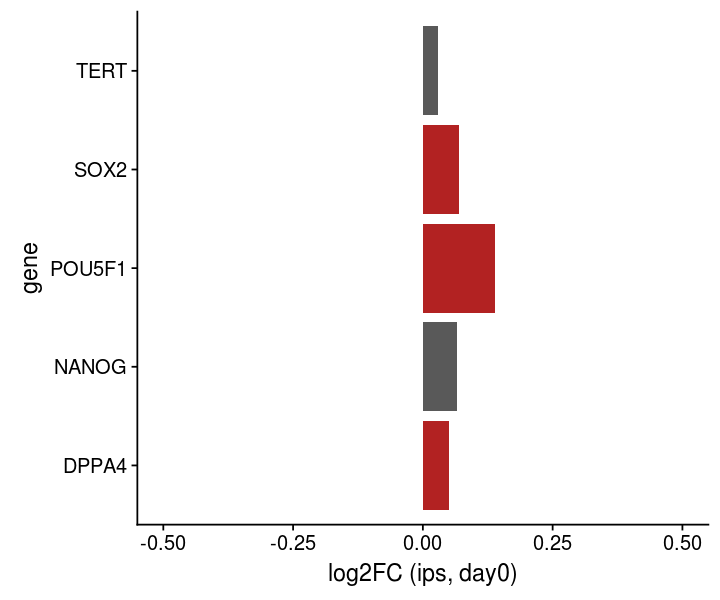

In [15]:
PlotLogFold(genes = pluri_markers, sce1 = sce_ips_lambda, sce2 = sce_day0, label = "log2FC (ips, day0)")

Warning message:
“Removed 1 rows containing missing values (position_stack).”Warning message:
“Removed 1 rows containing missing values (position_stack).”

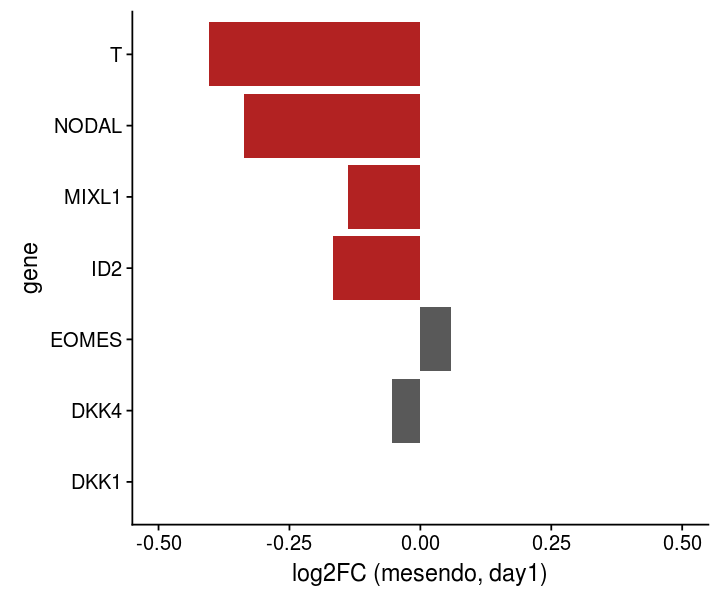

In [37]:
PlotLogFold(genes = c(mesendo_markers, "ENSG00000107984_DKK1",'ENSG00000104371_DKK4','ENSG00000115738_ID2',
                      'ENSG00000156574_NODAL'), sce1 = sce_mesendo_lambda, sce2 = sce_day1, label = "log2FC (mesendo, day1)")

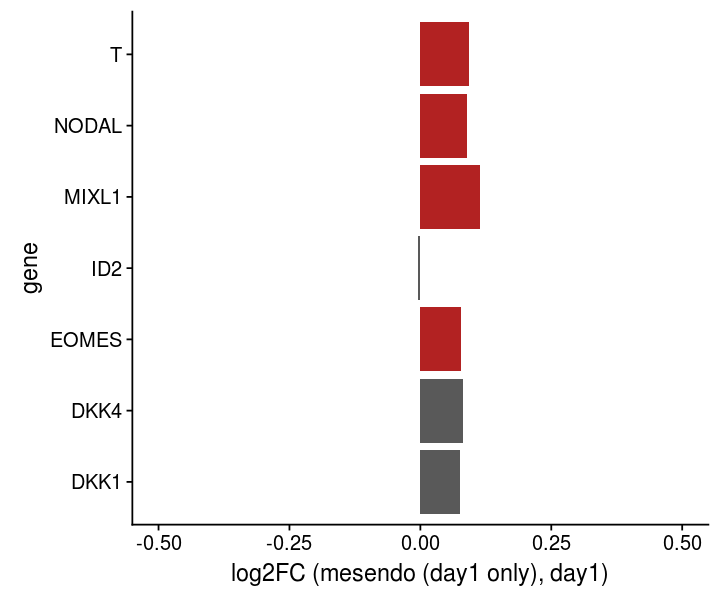

In [35]:
PlotLogFold(genes = c(mesendo_markers, "ENSG00000107984_DKK1",'ENSG00000104371_DKK4','ENSG00000115738_ID2',
                      'ENSG00000156574_NODAL'), sce1 = sce_mesendo_lambda[, sce_mesendo_lambda$day == "day1"], sce2 = sce_day1, label = "log2FC (mesendo (day1 only), day1)")

Warning message:
“Removed 4 rows containing missing values (position_stack).”Warning message:
“Removed 4 rows containing missing values (position_stack).”

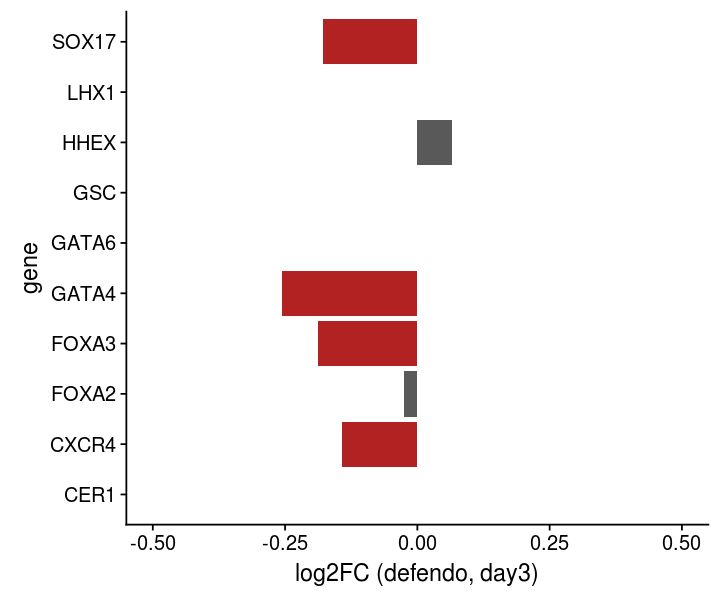

In [20]:
PlotLogFold(genes = c(defendo_markers,later_markers), sce1 = sce_defendo_lambda, sce2 = sce_day3, label = "log2FC (defendo, day3)")

In [3]:
pseudotimes = read.csv("/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/sce_merged_afterqc_filt_allexpts_alternative_pseudotime_methods_20180618.tsv",
                      sep = "\t")

In [23]:
head(pseudotimes)

cell_id,day,dpt_pseudotime,pseudo,princ_curve_scaled01
21843_1#10,day1,0.4105301,0.2926821,0.3525701
21843_1#100,day1,0.4518356,0.4847163,0.4977592
21843_1#101,day1,0.4551553,0.4038087,0.4671771
21843_1#102,day1,0.4026906,0.2607719,0.3388757
21843_1#103,day1,0.4355362,0.3553658,0.4276791
21843_1#105,day1,0.4382111,0.3480983,0.4560942


In [28]:
sce$dpt_pseudotime = pseudotimes$dpt_pseudotime

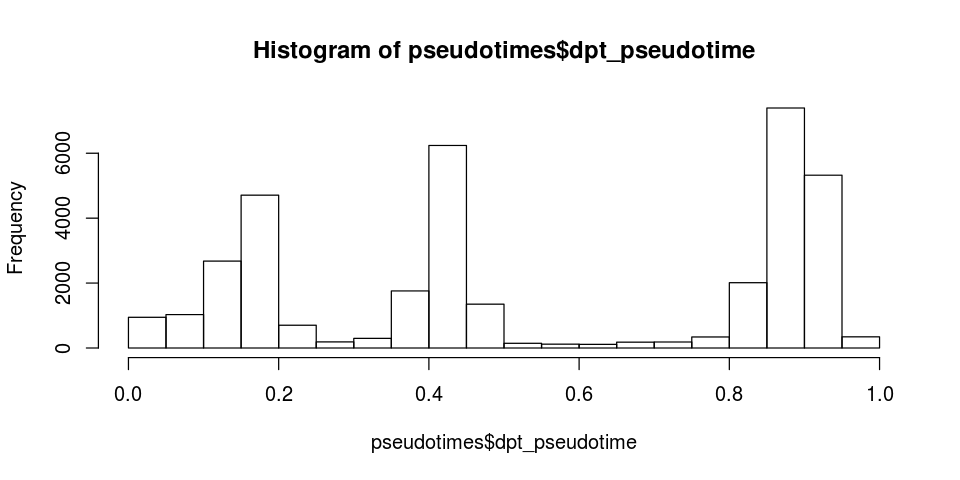

In [24]:
hist(pseudotimes$dpt_pseudotime)

In [29]:
sce$stage_dm <- "not assigned"
sce[,sce$dpt_pseudotime < 0.25 & sce$day == "day0"]$stage_dm <- "ips"
sce[,sce$dpt_pseudotime > 0.25 & sce$dpt_pseudotime < 0.6 & sce$day %in% c("day1","day2")]$stage_dm <- "mesendo"
sce[,sce$dpt_pseudotime > 0.6 & sce$day %in% c("day2","day3")]$stage_dm <- "defendo"

In [30]:
sce_ips_dm = sce[,sce$stage_dm == "ips"]
sce_mesendo_dm = sce[,sce$stage_dm == "mesendo"]
sce_defendo_dm = sce[,sce$stage_dm == "defendo"]

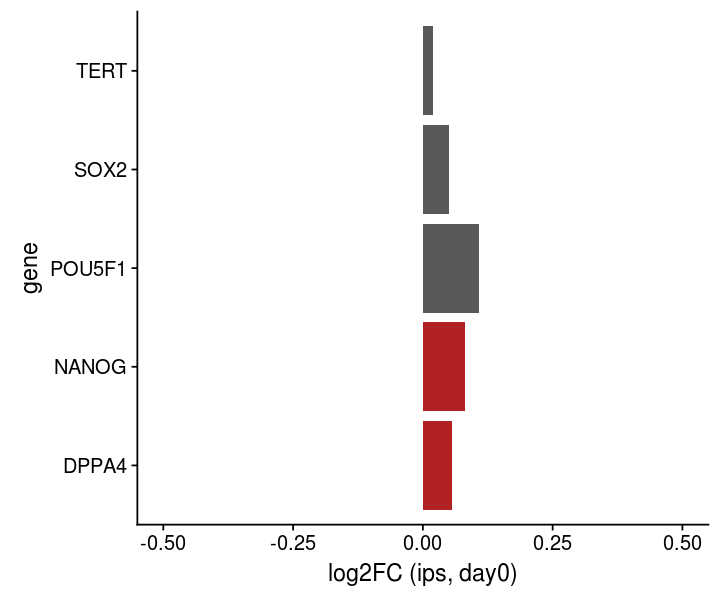

In [36]:
PlotLogFold(genes = pluri_markers, sce1 = sce_ips_dm, sce2 = sce_day0, label = "log2FC (ips, day0)")

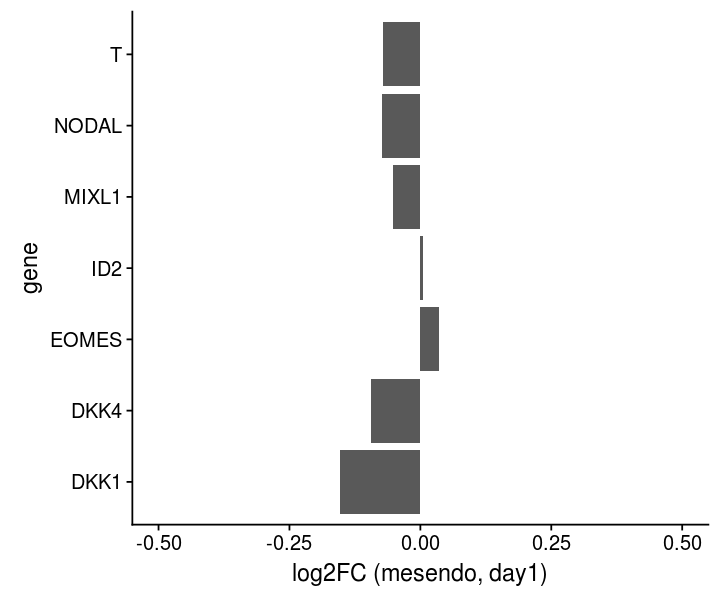

In [31]:
PlotLogFold(genes = c(mesendo_markers, "ENSG00000107984_DKK1",'ENSG00000104371_DKK4','ENSG00000115738_ID2',
                      'ENSG00000156574_NODAL'), sce1 = sce_mesendo_dm, sce2 = sce_day1, label = "log2FC (mesendo, day1)")

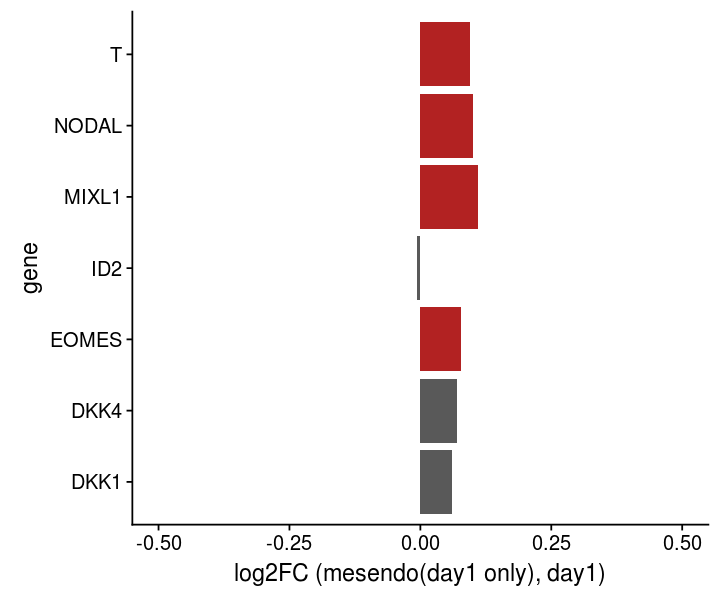

In [34]:
PlotLogFold(genes = c(mesendo_markers, "ENSG00000107984_DKK1",'ENSG00000104371_DKK4','ENSG00000115738_ID2',
                      'ENSG00000156574_NODAL'), sce1 = sce_mesendo_dm[, sce_mesendo_dm$day == "day1"], sce2 = sce_day1, 
            label = "log2FC (mesendo(day1 only), day1)")

Warning message:
“Removed 4 rows containing missing values (position_stack).”Warning message:
“Removed 4 rows containing missing values (position_stack).”

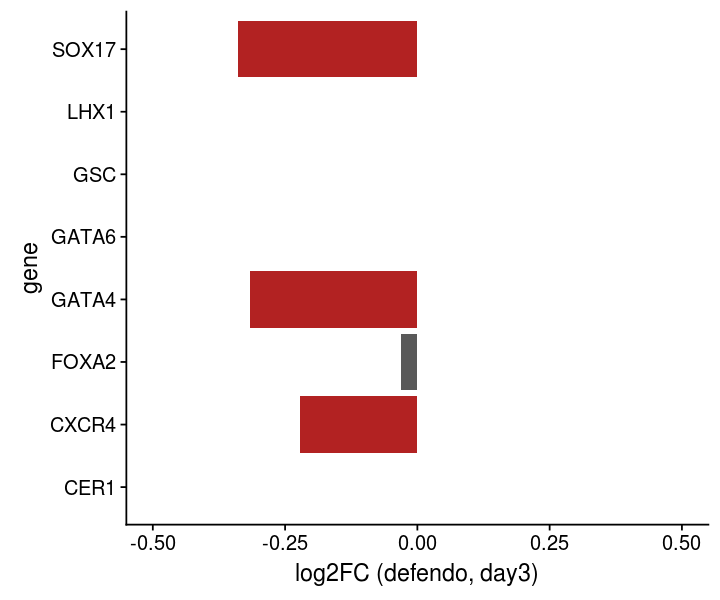

In [38]:
PlotLogFold(genes = defendo_markers, sce1 = sce_defendo_dm, sce2 = sce_day3, label = "log2FC (defendo, day3)")